In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [12]:
# plt.style.use("dark_background")
plt.rcParams['axes.labelsize'] = '14'

def preprocess_data(data):
    data["p_go_decision"] = data.decision == "go"
    data = data.join(pd.DataFrame(data["a_condition"].str.strip("[]").str.split(",").to_list(),
                                  columns=["a_0", "a_1", "a_2", "a_3"]))
    data = data.astype({"a_0": float, "a_1": float, "a_2": float, "a_3": float})
    # data["a_change"] = data.a_0 - data.a_1

    # only looking at test (not training/filler) no-collision trials where a decision was made
    data = data[~((data.decision == "None") | data.collision) & data.is_test_trial]
    print("Valid trials:", len(data))
    print("Extreme RTs:", len(data[~((data.RT>0) & (data.RT<4))]))
    data = data[(data.RT>0) & (data.RT<3)]
    return data


def plot_RT_hist(data, save=False):
    plt.figure()
    plt.title("Participant %i" % (data.iloc[0].participant_id))
    sns.distplot(data[data.decision=="go"].RT, bins=20)
    sns.distplot(data[data.decision=="stay"].RT, bins=20)
    plt.gca().set_xlim((-0.05, 3.05))
    if save:
        plt.savefig("../figures/rt_hist_%i.png" % data.iloc[0].participant_id, bbox_inches='tight')

def plot_p_turn(data, save=False):
#     plt.figure()
    plt.title("Participant %i" % (data.iloc[0].participant_id))
    g = sns.catplot(data=data, x="a_1", y="p_go_decision", col="d_condition",
            hue="a_2", kind="point", dodge=True)
    for ax in g.axes[0]:
        ax.set_ylim((-0.05, 1.05))

    if save:
        plt.savefig("../figures/p_turn_%i.png" % data.iloc[0].participant_id, bbox_inches='tight')
        
def plot_rt(data, save=False):
    sns.catplot(data=data, x="a_1", y="RT", row="decision", col="d_condition",
            hue="a_2", kind="point", estimator=np.nanmean)
    plt.savefig("../figures/rt_%i.png" % data.iloc[0].participant_id, bbox_inches='tight')

Valid trials: 405
Extreme RTs: 2
Valid trials: 419
Extreme RTs: 0
Valid trials: 415
Extreme RTs: 0
Valid trials: 405
Extreme RTs: 0
Valid trials: 406
Extreme RTs: 0
Valid trials: 412
Extreme RTs: 3
Valid trials: 416
Extreme RTs: 1
Valid trials: 394
Extreme RTs: 2


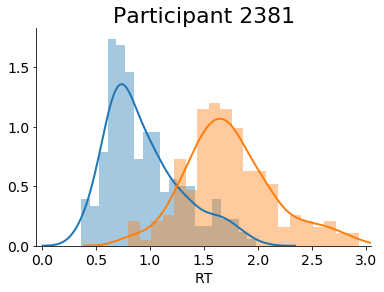

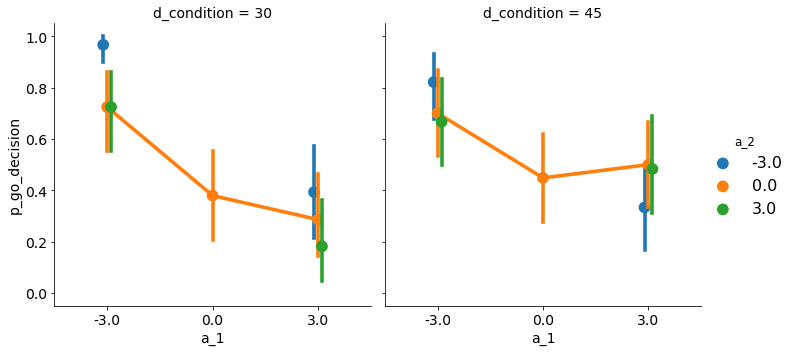

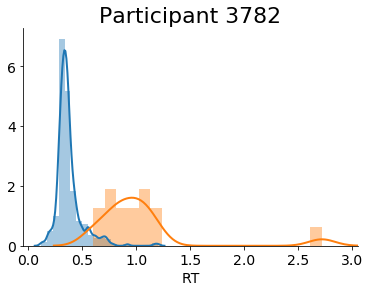

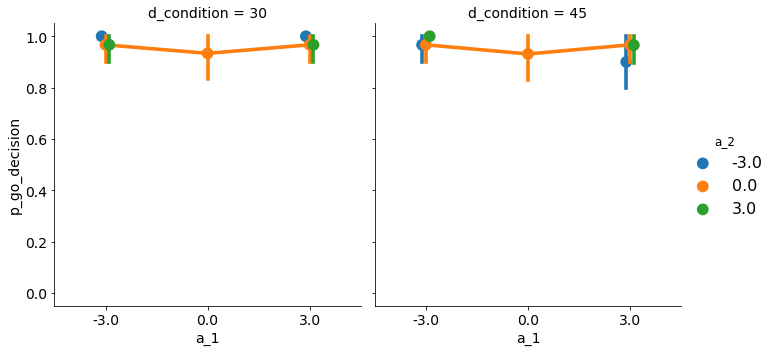

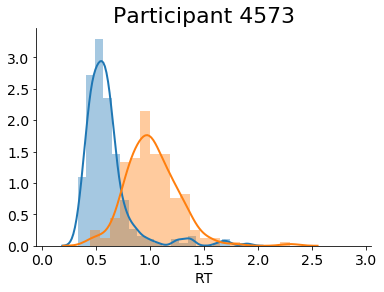

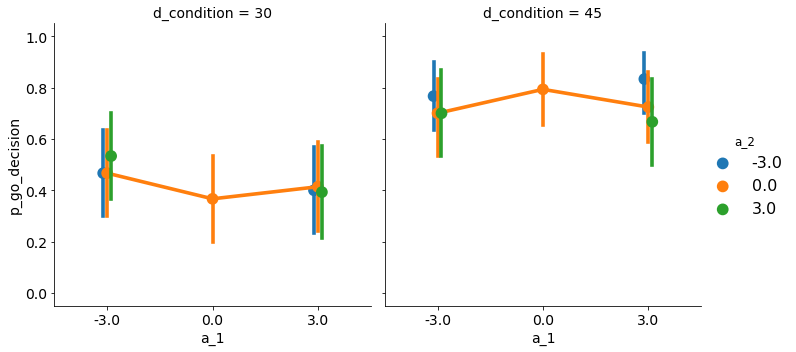

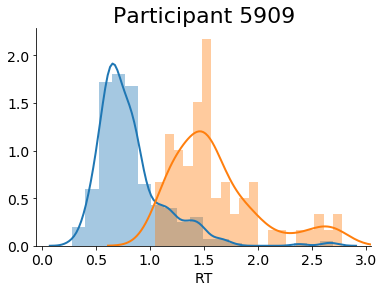

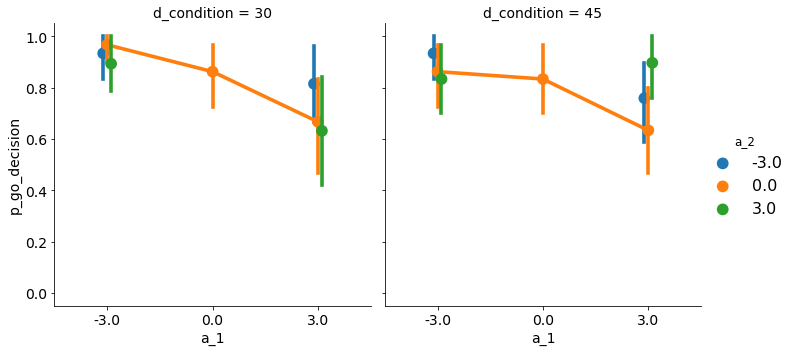

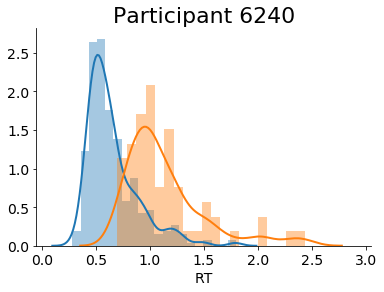

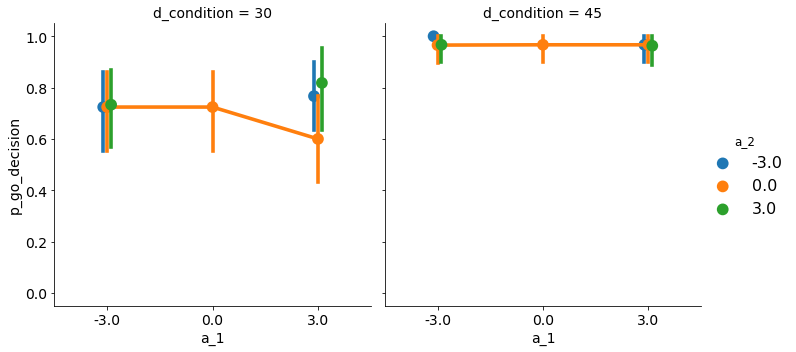

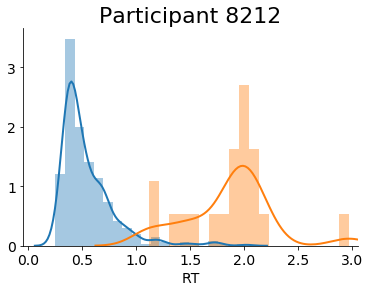

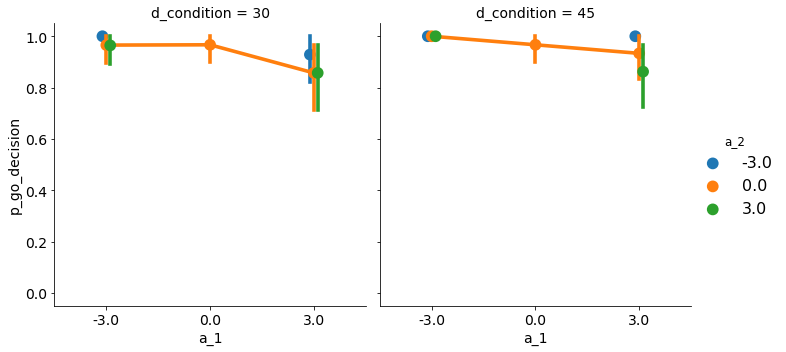

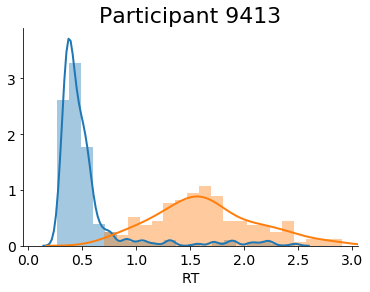

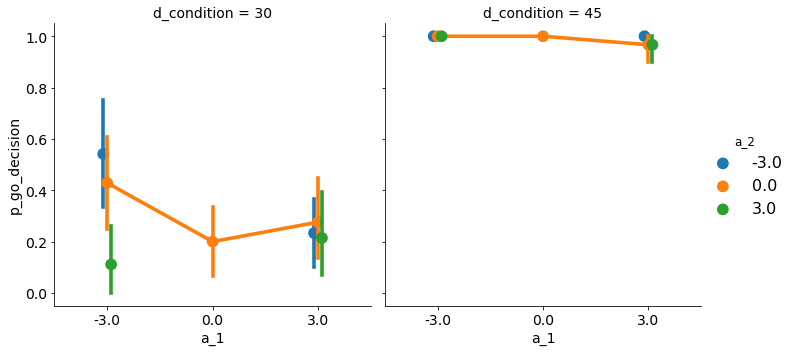

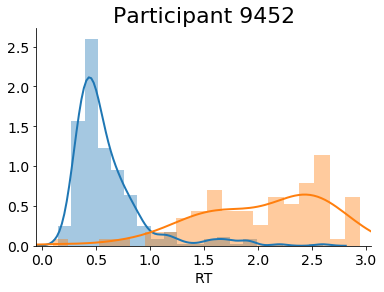

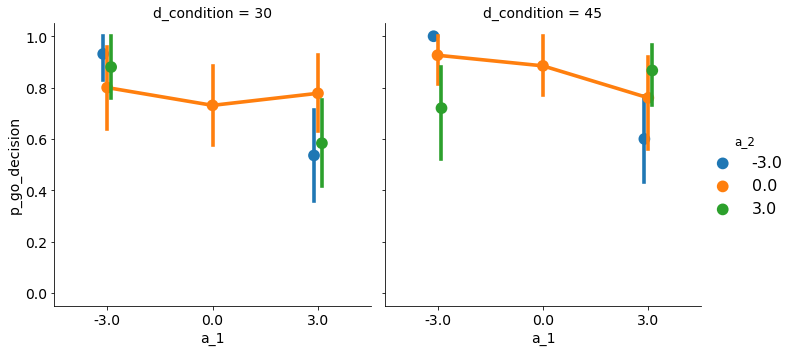

In [14]:
directory = "../data/experiment1-2d"
for filename in os.listdir(directory):
    data = pd.read_csv(os.path.join(directory, filename), sep="\t")
    data = preprocess_data(data)
    plot_RT_hist(data, save=True)
    plot_p_turn(data, save=True)

# Response times

Valid trials: 405
Extreme RTs: 2
Valid trials: 415
Extreme RTs: 0
Valid trials: 405
Extreme RTs: 0
Valid trials: 394
Extreme RTs: 2


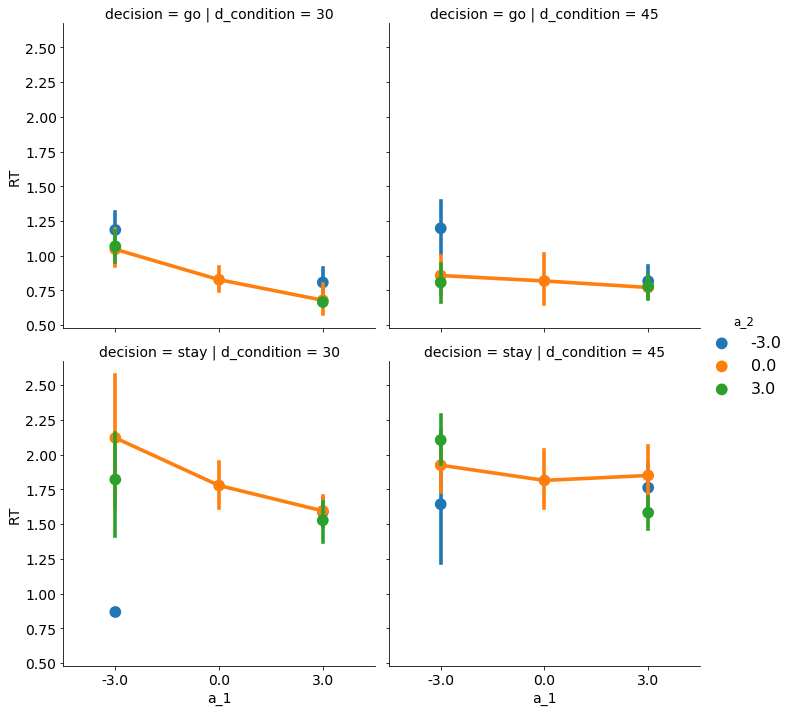

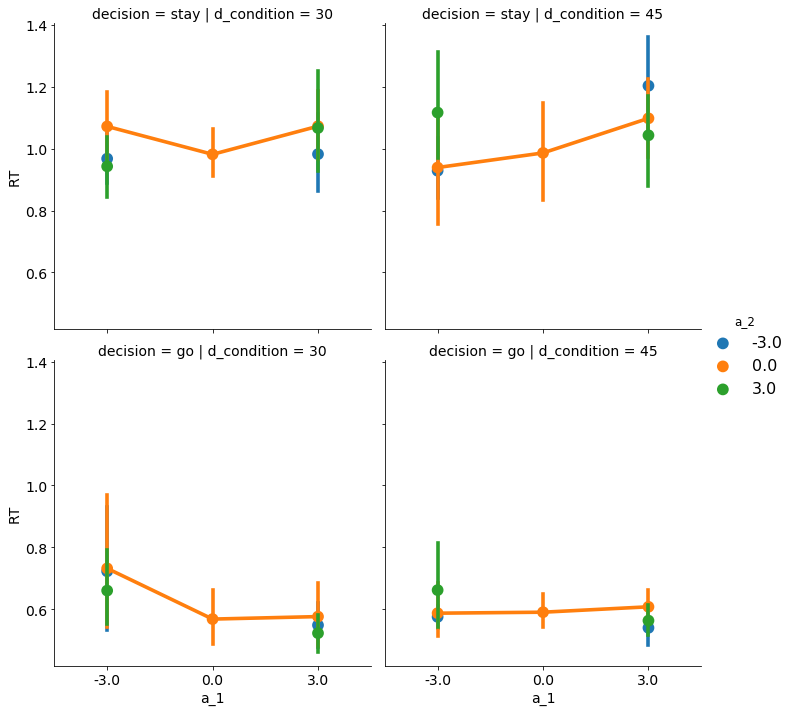

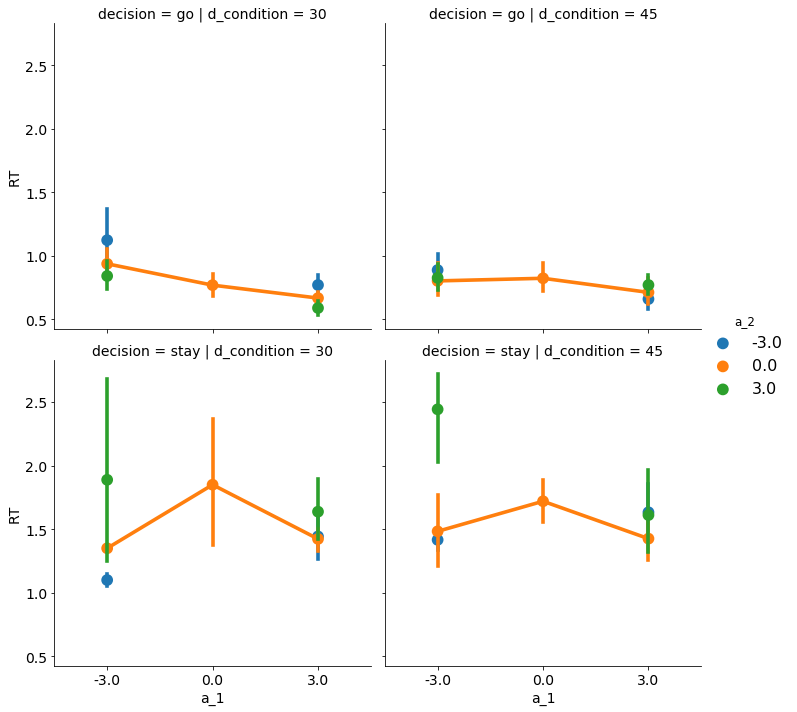

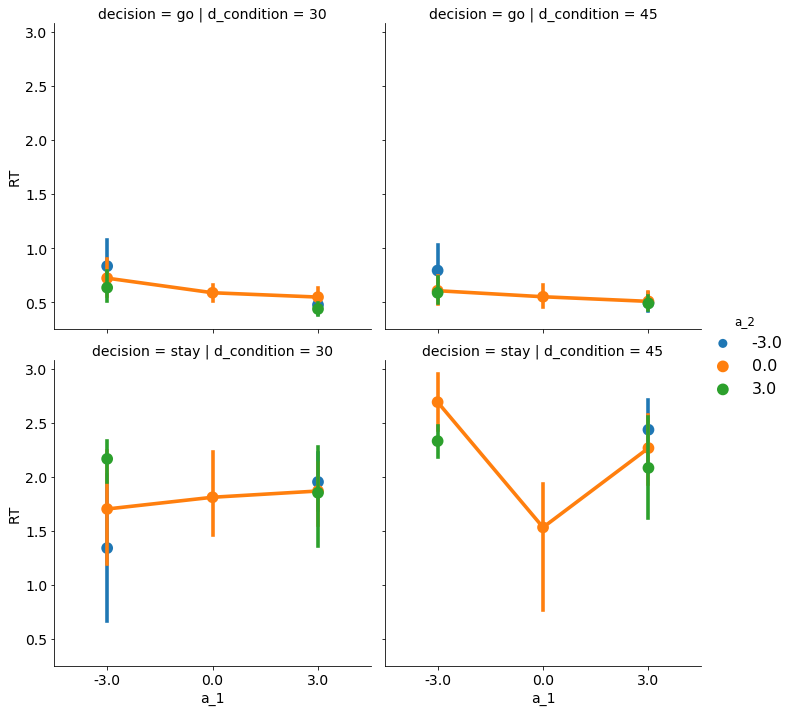

In [16]:
excluded_subjects = [3782, 6240, 8212, 9413]

for filename in os.listdir(directory):
    if not any(str(subj_id) in filename for subj_id in excluded_subjects):
        data = pd.read_csv(os.path.join(directory, filename), sep="\t")
        data = preprocess_data(data)
        plot_rt(data, save=True)

# Extra plots

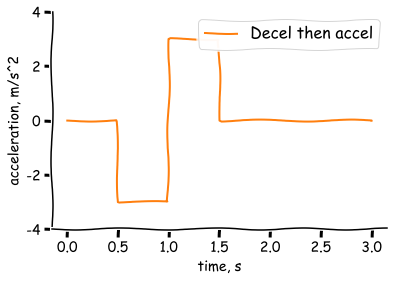

In [39]:
plt.xkcd()
fig, ax = plt.subplots()
t = np.linspace(0,3,150)
n = 25
a = np.concatenate((np.zeros(n), 3*np.ones(n), -3*np.ones(n),
                    np.zeros(n), np.zeros(n), np.zeros(n)))
# ax.plot(t, a, label="Accel then decel")
a = np.concatenate((np.zeros(n), -3*np.ones(n), 3*np.ones(n),
                    np.zeros(n), np.zeros(n), np.zeros(n)))
ax.plot(t, a, color="C1", label="Decel then accel")
plt.legend(loc="upper right")
ax.set_ylim(-4, 4)
ax.set_xlabel("time, s")
ax.set_ylabel("acceleration, m/s^2")
# plt.savefig("../figures/accel.png")
plt.savefig("../figures/decel.png")

# Stats